## Import libraries

I'll import datetime to handle year, numpy to work with arrays and pandas to read in the dataset files, matplotlib & seaborn for plotting and sklearn for various machine learning models.

In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Reading datasets

I'll read the dataset and get information about it.

In [2]:
df=pd.read_csv("C:\\Users\\rashi\\Downloads\\C_E_2022.csv")

pd.pandas.set_option('display.max_columns',None)

df.head(10)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2

Let's first split the dataset into train and test datasets.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], 
                                                    df.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 807 to 1126
Columns: 140 entries, Unnamed: 0 to Battery
dtypes: float64(6), int64(1), object(133)
memory usage: 983.7+ KB


## Index
The first column is the index for each data point and hence we can simply remove it.

In [5]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

## Name
Let's explore the various cars in the dataset.

In [9]:
X_train["Make"].value_counts()

Maruti Suzuki       104
Hyundai              89
Mahindra             82
Tata                 67
Toyota               58
Honda                45
Renault              30
Ford                 29
Skoda                28
Volkswagen           27
Bmw                  24
Land Rover Rover     23
Nissan               20
Audi                 19
Jeep                 18
Jaguar               17
Kia                  16
Fiat                 16
Volvo                13
Datsun               12
Lamborghini          10
Porsche              10
Mg                    9
Icml                  9
Maruti Suzuki R       9
Land Rover            6
Force                 6
Mini                  6
Ferrari               6
Lexus                 6
Maserati              4
Bentley               3
Isuzu                 3
Aston Martin          3
Premier               3
Mitsubishi            3
Bajaj                 1
Bugatti               1
Dc                    1
Name: Make, dtype: int64

As it appears, there are several cars in the dataset, some of them with a count higher than 1. Sometimes the resale value of a car also depends on manufacturer of car and hence, I'll extract the manufacturer from this column and add it to the dataset.

In [11]:
make_train = X_train["Make"].str.split(" ", expand = True)
make_test = X_test["Make"].str.split(" ", expand = True)

In [12]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

Let's also confirm that there are no null values and identify all unique values.

Text(0, 0.5, 'Count of cars')

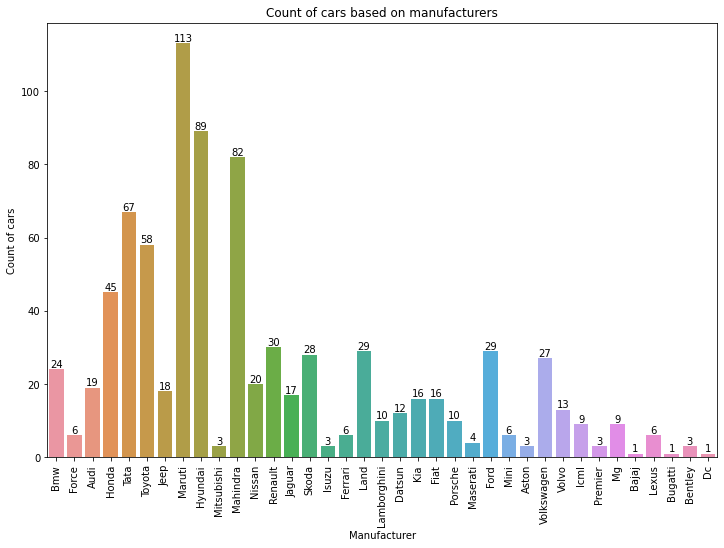

In [13]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

Maximum cars in the dataset are by the manufacturer Maruti and there are no null values.

I'll also drop the Make column.

In [14]:
X_train.drop("Make", axis = 1, inplace = True)
X_test.drop("Make", axis = 1, inplace = True)

## Exploring Fuel Feature


c:\Users\rashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


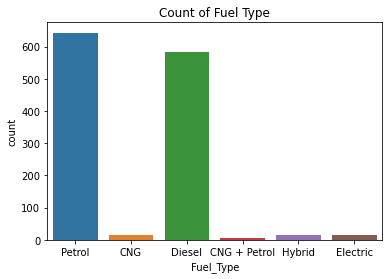

In [17]:
# let's see the variation of fuel type

sns.countplot(df.Fuel_Type)
plt.title("Count of Fuel Type")
plt.show()

Maximum cars in the dataset use Petrol.

In [19]:
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',', '')
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs', '')
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('.', '')
df['Ex-Showroom_Price']

C:\Users\rashi\AppData\Local\Temp/ipykernel_11492/2234538796.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('.', '')


0         292667
1         236447
2         296661
3         334768
4         272223
          ...   
1271     1302000
1272     1421000
1273     1431000
1274     1201000
1275     6862560
Name: Ex-Showroom_Price, Length: 1276, dtype: object

## Mileage

In [9]:
df['City_Mileage'] = df['City_Mileage'].str.replace('?', '')
df['City_Mileage'] = df['City_Mileage'].str.replace('km', '')
df['City_Mileage'] = df['City_Mileage'].str.replace('/', '')
df['City_Mileage'] = df['City_Mileage'].str.replace('litre', '')
df['City_Mileage'] = df['City_Mileage'].str.replace(',', '')
df['City_Mileage']

C:\Users\rashi\AppData\Local\Temp/ipykernel_14708/2887398391.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['City_Mileage'] = df['City_Mileage'].str.replace('?', '')


0       23.6 
1       23.6 
2         NaN
3       23.6 
4       23.6 
        ...  
1271    22.6 
1272    22.6 
1273      18 
1274    14.3 
1275    8.25 
Name: City_Mileage, Length: 1276, dtype: object

In [7]:
print(sum(X_train["City_Mileage"].isnull()))
print(sum(X_test["City_Mileage"].isnull()))

381
174
